# Question 1:

ABC Bank has +1,000 employees. The Human Resources department wants to know the chain of command for each employee.


1. Produce the code which will take an employee ID as input and produce all their managers up the hierarchy, with the identifier of each manager. For example, if the organizational chart looks like:<br>
<img src="Images/q2.png" width="450" height="300">


Then for input employee ID 6, the output would be employee ID 3, 1 <br>
<img src="Images/q1.png" width="400" height="300">



2. Produce the code which will take an employee ID as input and produce all employees underneath their manager, including the manager.
For the sample above:
    - 6 would result in 3, 5, 6
    - 3 would result in 1, 2, 3, 4, 5, 6
    - 4 would result in 2, 4  


In [63]:
from binarytree import Node

# Create the binary tree as per the given hierarchy
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)

# Function to find the chain of command
def find_chain_of_command(root, employee_id, chain = None):
    if chain is None:
        chain = []
        
    if root is None:
            return None
        
    if root.val == employee_id:
            return chain
    
    #Check left sub tree
    
    left_result = find_chain_of_command(root.left, employee_id, chain + [root.value])
    if left_result is not None:
        return left_result
    
    # Check right sub tree
    right_result = find_chain_of_command(root.right, employee_id, chain + [root.value])
    if right_result is not None:
        return right_result
    
    return None

#Visual 
print(root)

#Find and print chain of employee

employee_id = 6
chain_of_command = find_chain_of_command(root, employee_id)
print(f"Chain of command for employee ID {employee_id} : {chain_of_command}")


    __1__
   /     \
  2       3
 / \     /
4   5   6

Chain of command for employee ID 6 : [1, 3]


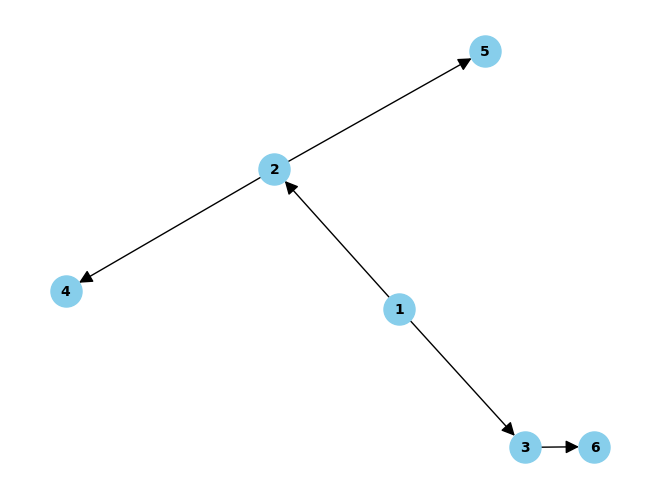

Chain of command for employee ID 6: [3, 1]


In [56]:
import networkx as nx
import matplotlib.pyplot as plt
from binarytree import Node

# Create the graph
G = nx.DiGraph()

# Add nodes and edges according to the hierarchy
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)
edges = [
    (1, 2), (1, 3),
    (2, 4), (2, 5),
    (3, 6)
]

G.add_edges_from(edges)

# Function to find the chain of command using DFS
def find_chain_of_command(G, employee_id):
    chain = []
    def dfs(node, target):
        if node == target:
            return True
        for neighbor in G.successors(node):
            if dfs(neighbor, target):
                chain.append(node)
                return True
        return False
    dfs(1, employee_id)  # assuming 1 is the root
    return chain

# Visualize the graph
pos = nx.spring_layout(G)
labels = {i: str(i) for i in G.nodes}
nx.draw(G, pos, labels=labels, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
plt.show()

# Find and print the chain of command for employee ID 6
employee_id = 6
chain_of_command = find_chain_of_command(G, employee_id)
print(f"Chain of command for employee ID {employee_id}: {chain_of_command}")
